Cross-validation: a step in the process of building a machine learning model which helps up ensure that our model fit the data accurately and also ensures that we do not overfit.

## Overfitting

Below is an example of Decision Tree to illustrate "overfitting".

In [2]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [33]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,13.3,0.34,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.5,3
1,7.7,0.41,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4,2
2,7.5,0.40,0.18,1.6,0.079,24.0,58.0,0.99650,3.34,0.58,9.4,2
3,9.2,0.67,0.10,3.0,0.091,12.0,48.0,0.99888,3.31,0.54,9.5,3
4,6.7,0.56,0.09,2.9,0.079,7.0,22.0,0.99669,3.46,0.61,10.2,2


In [34]:
df.groupby('quality').size()

quality
0     10
1     53
2    681
3    638
4    199
5     18
dtype: int64

In [5]:
quality_mapping = {
 3: 0,
 4: 1,
 5: 2,
 6: 3,
 7: 4,
 8: 5
}

In [11]:
# map y to 0 ~ 5
df['quality'] = df.quality.map(quality_mapping)

In [12]:
# shuffle the dataframe (frac = 1 meaning keeping the same rows of data)
df = df.sample(frac=1).reset_index(drop=True)


In [14]:
# top 1000 rows are selected
# for training
df_train = df.head(1000)
# bottom 599 values are selected
# for testing/validation
df_test = df.tail(599)

In [35]:
df_train.groupby('quality').size()

quality
0      6
1     27
2    428
3    404
4    122
5     13
dtype: int64

In [16]:
# train a decision tree model
from sklearn import tree
from sklearn import metrics

# initialize a tree classfier
clf = tree.DecisionTreeClassifier(max_depth=3)

# specify the to be trained columns
cols = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [17]:
# train (fit) the model on the provided features to predict the mapped quality
clf.fit(df_train[cols],df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [18]:
# generate predictions of the training set
train_predictions = clf.predict(df_train[cols])

In [20]:
# generate predictions of the test set
test_predictions = clf.predict(df_test[cols])

In [21]:
# calculate the accuracy of predictions on training set
train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)

In [22]:
# calculate the accuracy of predictions on training set
test_accuracy = metrics.accuracy_score(df_test.quality,test_predictions)

In [27]:
# compare
print('train_accuracy: ',round(train_accuracy,3), '\ntest_accuracy: ', round(test_accuracy,3))

train_accuracy:  0.578 
test_accuracy:  0.524


In [36]:
# chart out accuracy against max_depth

# import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics
# import matplotlib and seaborn
# for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
# This line ensures that the plot is displayed
# inside the notebook
%matplotlib inline

In [61]:
# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

In [62]:
# iterate over a few depth values
for depth in range(1, 26):
 # init the model
 clf = tree.DecisionTreeClassifier(max_depth=depth)
 # columns/features for training
 # note that, this can be done outside
 # the loop
 cols = [
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol'
 ]
 # fit the model on given features
 clf.fit(df_train[cols], df_train.quality)
 # create training & test predictions
 train_predictions = clf.predict(df_train[cols])
 test_predictions = clf.predict(df_test[cols])
 # calculate training & test accuracies
 train_accuracy = metrics.accuracy_score(
 df_train.quality, train_predictions
 )
 test_accuracy = metrics.accuracy_score(
 df_test.quality, test_predictions
 )

 # append accuracies
 train_accuracies.append(train_accuracy)
 test_accuracies.append(test_accuracy)

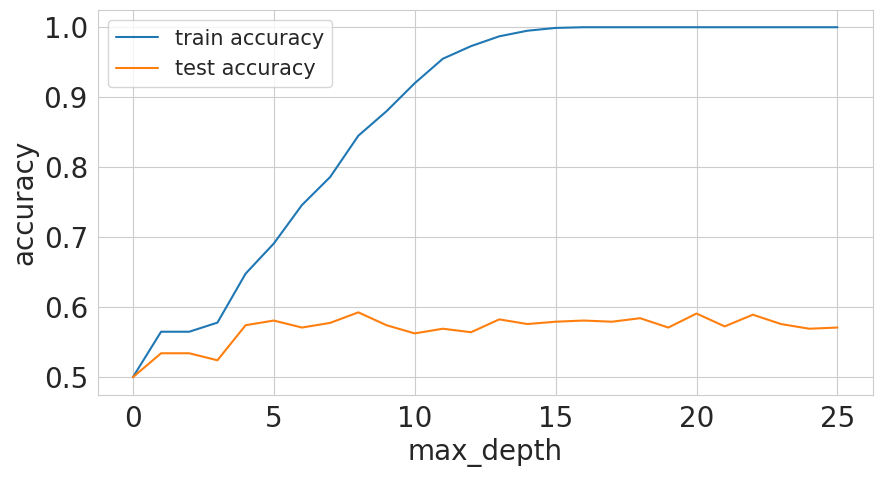

In [64]:
# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

Thus definition of overfitting can be: the model keeps getting complex, learning about the training data better and better, but the performance of the model on test data does not improve at all. Another definition of overfitting would be when the test loss increases as we keep improving training loss.

## Cross-validation

Definition: Divide training set into a few parts. Train the model on some of these parts and test on the remaining parts.

 - hold-out set: Use when we have a large amount of data and model inference is a time-consuming process; frequently used with time-series data (e.g. use 2018-2021 data in training set, use 2022 data in validation set)
 - k-fold cross-validation
 - stratified k-fold cross-validation: go-to choice
 - leave-one-out cross-validation: used for small datasets (k-fold, k = N, number of samples in the dataset)
 - group k-fold cross-validation: used when an id has multiple records in the dataset, and you want all records of the same id to all in training set or validation set. Use GroupKFold from scikit-learn.

### K-fold

In [66]:
import pandas as pd
from sklearn import model_selection

# we create a new column called kfold and fill it with -1
df['kfold']= -1

In [67]:
# the next step is to randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)

In [69]:
# initiate the kfold class from model_selection module
kf = model_selection.KFold(n_splits=5)

In [71]:
kf.split(X=df)

<generator object _BaseKFold.split at 0x7f987ea5ced0>

In [74]:
# fill the new kfold column
for fold, (trn_, val_) in enumerate(kf.split(X=df)):
    df.loc[val_,'kfold'] = fold

In [76]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
1594,7.5,0.42,0.31,1.6,0.080,15.0,42.0,0.99780,3.31,0.64,9.0,2,4
1595,6.9,0.52,0.25,2.6,0.081,10.0,37.0,0.99685,3.46,0.50,11.0,2,4
1596,12.1,0.40,0.52,2.0,0.092,15.0,54.0,1.00000,3.03,0.66,10.2,2,4
1597,7.1,0.59,0.01,2.5,0.077,20.0,85.0,0.99746,3.55,0.59,9.8,2,4
1598,10.9,0.21,0.49,2.8,0.088,11.0,32.0,0.99720,3.22,0.68,11.7,3,4


### Stratified K-fold

If the dataset is skewed for binary classification with 90% positive samples and only 10% negative samples, using simple k-fold cv can result in folds with all negative samples.
<br>
Stratified k-folds cv keeps the ratio of labels in each fold constant

In [82]:
# we create a new column called kfold and fill it with -1
df["kfold"] = -1
# the next step is to randomize the rows of the data
df = df.sample(frac=1).reset_index(drop=True)
# fetch targets
y = df.quality.values
# initiate the kfold class from model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)
# fill the new kfold column
for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    df.loc[v_, 'kfold'] = f

In [84]:
# check the distribution of fold 1
df[df['kfold']==1].groupby('quality').size()

quality
0      2
1     11
2    136
3    128
4     39
5      4
dtype: int64

In [85]:
# check the overall distribution
df.groupby('quality').size()

quality
0     10
1     53
2    681
3    638
4    199
5     18
dtype: int64

Text(0, 0.5, 'count')

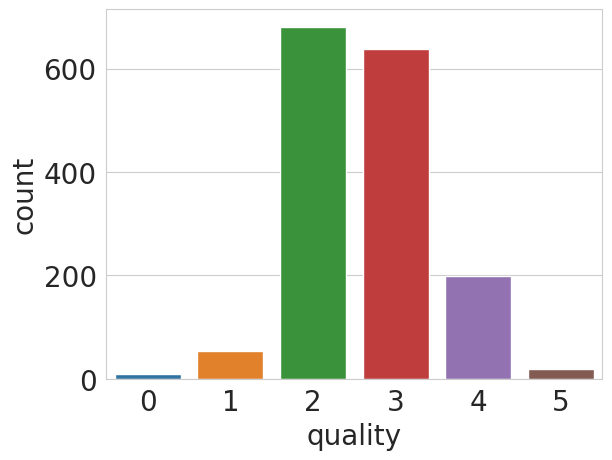

In [89]:
# check overall distribution by countplot
b = sns.countplot(x = 'quality', data = df)
b.set_xlabel("quality", fontsize = 20)
b.set_ylabel("count",fontsize = 20)

If it's a standard classification problem, choose stratified k-fold blindly.

To use stratified k-fold for a regression problem: 
<br>
we have first to divide the target into bins, and then we can use stratified k-fold in the same way as for classification problems. There are several choices for selecting the appropriate number of bins. If you have a lot of samples( > 10k, > 100k), then you don’t need to care about the number of bins. Just divide the data into 10 or 20 bins. If you do not have a lot of samples, you can use a simple rule like Sturge’s Rule to calculate the appropriate number of bins.
<br>
Number of Bins = 1 + log2(N)

In [91]:
# stratified-kfold for regression
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection

In [93]:
def create_folds(data):
 # we create a new column called kfold and fill it with -1
    data["kfold"] = -1

 # the next step is to randomize the rows of the data
    data = data.sample(frac=1).reset_index(drop=True)
 # calculate the number of bins by Sturge's rule
 # I take the floor of the value, you can also
 # just round it
    num_bins = int(np.floor(1 + np.log2(len(data))))
 # bin targets
    data.loc[:, "bins"] = pd.cut(
    data["target"], bins=num_bins, labels=False
    )

 # initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)

 # fill the new kfold column
 # note that, instead of targets, we use bins!
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f

 # drop the bins column
    data = data.drop("bins", axis=1)
 # return dataframe with folds
    return data

In [94]:
 X, y = datasets.make_regression(
 n_samples=15000, n_features=100, n_targets=1
 )
 # create a dataframe out of our numpy arrays
 df = pd.DataFrame(
 X,
 columns=[f"f_{i}" for i in range(X.shape[1])]
 )
 df.loc[:, "target"] = y
 # create folds
 df = create_folds(df)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


In [98]:
df.groupby('kfold')['target'].mean()

kfold
0   -0.566333
1   -0.514455
2   -0.177011
3   -1.110170
4   -0.812885
Name: target, dtype: float64

Open Question: Scikit-learn cannot combine GroupKFold with StratifiedKFold. How to do that?

In [103]:
def stratified_group_k_fold(X, y, groups, k, seed=None):
    """Source: https://www.kaggle.com/jakubwasikowski/stratified-group-k-fold-cross-validation """
    labels_num = np.max(y) + 1
    y_counts_per_group = collections.defaultdict(lambda: np.zeros(labels_num))
    y_distr = collections.Counter()
    for label, g in zip(y, groups):
        y_counts_per_group[g][label] += 1
        y_distr[label] += 1

    y_counts_per_fold = collections.defaultdict(lambda: np.zeros(labels_num))
    groups_per_fold = collections.defaultdict(set)

    def eval_y_counts_per_fold(y_counts, fold):
        y_counts_per_fold[fold] += y_counts
        std_per_label = []
        for label in range(labels_num):
            label_std = np.std([y_counts_per_fold[i][label] / y_distr[label] for i in range(k)])
            std_per_label.append(label_std)
        y_counts_per_fold[fold] -= y_counts
        return np.mean(std_per_label)

    groups_and_y_counts = list(y_counts_per_group.items())
    random.Random(seed).shuffle(groups_and_y_counts)

    for g, y_counts in sorted(groups_and_y_counts, key=lambda x: -np.std(x[1])):
        best_fold = None
        min_eval = None
        for i in range(k):
            fold_eval = eval_y_counts_per_fold(y_counts, i)
            if min_eval is None or fold_eval < min_eval:
                min_eval = fold_eval
                best_fold = i
        y_counts_per_fold[best_fold] += y_counts
        groups_per_fold[best_fold].add(g)

    all_groups = set(groups)
    for i in range(k):
        train_groups = all_groups - groups_per_fold[i]
        test_groups = groups_per_fold[i]

        train_indices = [i for i, g in enumerate(groups) if g in train_groups]
        test_indices = [i for i, g in enumerate(groups) if g in test_groups]

        yield train_indices, test_indices